<a href="https://colab.research.google.com/github/abyasingh/GGH_Ideathon/blob/main/air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns

In [2]:
per_day = pd.read_csv('/content/air_pollution_data.csv')

In [3]:
print(per_day.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [4]:
print(per_day['Date'])

0        2015-01-01
1        2015-01-02
2        2015-01-03
3        2015-01-04
4        2015-01-05
            ...    
29526    2020-06-27
29527    2020-06-28
29528    2020-06-29
29529    2020-06-30
29530    2020-07-01
Name: Date, Length: 29531, dtype: object


In [5]:
def getArray(csvfile):
    city_per_day = np.empty((0,16))
    for row in per_day:
        city_per_day = np.vstack((city_per_day, np.array(row)))
    return city_per_day

def getCities(data):
    cities = data['City'].value_counts().to_frame()
    cities = cities.sort_index().index
    for i in cities:
        print(i)

def exploreData(data):
    getCities(data)

In [6]:
exploreData(per_day)

Ahmedabad
Aizawl
Amaravati
Amritsar
Bengaluru
Bhopal
Brajrajnagar
Chandigarh
Chennai
Coimbatore
Delhi
Ernakulam
Gurugram
Guwahati
Hyderabad
Jaipur
Jorapokhar
Kochi
Kolkata
Lucknow
Mumbai
Patna
Shillong
Talcher
Thiruvananthapuram
Visakhapatnam


In [7]:
def getMissingValues(data):
    missing_val = data.isnull().sum()
    missing_val_percentage = 100 * data.isnull().sum() / len(data)
    missin_values_array = pd.concat([missing_val, missing_val_percentage], axis=1)
    missin_values_array = missin_values_array.rename(columns =
                                                     {0 : 'Missing Values', 1 : '% of Total Values'})
    missin_values_array = missin_values_array[
        missin_values_array.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return missin_values_array

In [8]:
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

In [9]:
def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    return data, pollutants

In [10]:
def handleMissingValues(data):
    missing_values = getMissingValues(data)
    updatedCityData = mergeColumns(data)
    updatedCityData, pollutants = subsetColumns(updatedCityData)
    return updatedCityData, pollutants

In [11]:
updatedCityData, newColumns = handleMissingValues(per_day)
updatedCityData

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,NaN,NaN,NaN,18.22,0.92,27.64,133.36,0.02
1,2015-01-02,Ahmedabad,NaN,NaN,NaN,15.69,0.97,24.55,34.06,12.95
2,2015-01-03,Ahmedabad,NaN,NaN,NaN,19.30,17.40,29.07,30.70,25.45
3,2015-01-04,Ahmedabad,NaN,NaN,NaN,18.48,1.70,18.59,36.08,15.57
4,2015-01-05,Ahmedabad,NaN,NaN,NaN,21.42,22.10,39.33,39.31,28.68
...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.0,Good,65.96,25.06,0.47,8.55,23.30,15.04
29527,2020-06-28,Visakhapatnam,70.0,Satisfactory,98.47,26.06,0.52,12.72,30.14,3.33
29528,2020-06-29,Visakhapatnam,68.0,Satisfactory,88.64,29.53,0.48,8.42,30.96,0.02
29529,2020-06-30,Visakhapatnam,54.0,Satisfactory,66.61,29.26,0.52,9.84,28.30,0.00


In [12]:
filtered_df = updatedCityData[updatedCityData['City'] == 'Lucknow']
print(filtered_df)

            Date     City   AQI    AQI_Bucket  Particulate_Matter    NO2  \
19846 2015-01-01  Lucknow   NaN           NaN                 NaN  13.46   
19847 2015-01-02  Lucknow   NaN           NaN                 NaN  10.76   
19848 2015-01-03  Lucknow   NaN           NaN                 NaN  12.43   
19849 2015-01-04  Lucknow   NaN           NaN                 NaN  12.46   
19850 2015-01-05  Lucknow   NaN           NaN                 NaN  12.27   
...          ...      ...   ...           ...                 ...    ...   
21850 2020-06-27  Lucknow  74.0  Satisfactory                 NaN  19.22   
21851 2020-06-28  Lucknow  77.0  Satisfactory                 NaN  17.67   
21852 2020-06-29  Lucknow  65.0  Satisfactory                 NaN  18.47   
21853 2020-06-30  Lucknow  69.0  Satisfactory                 NaN  11.94   
21854 2020-07-01  Lucknow  76.0  Satisfactory                 NaN  14.44   

          CO     SO2     O3  BTX  
19846  12.15  169.57  25.92  NaN  
19847  14.00  169

In [19]:
def visualisePollutants(udata, columns, colors=None, save_path=None):
    data = udata.copy()
    data.set_index('Date', inplace=True)

    if colors:
        axes = data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True, color=colors)
    else:
        axes = data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True)

    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')

    if save_path:
        plt.savefig(save_path)

    plt.show()

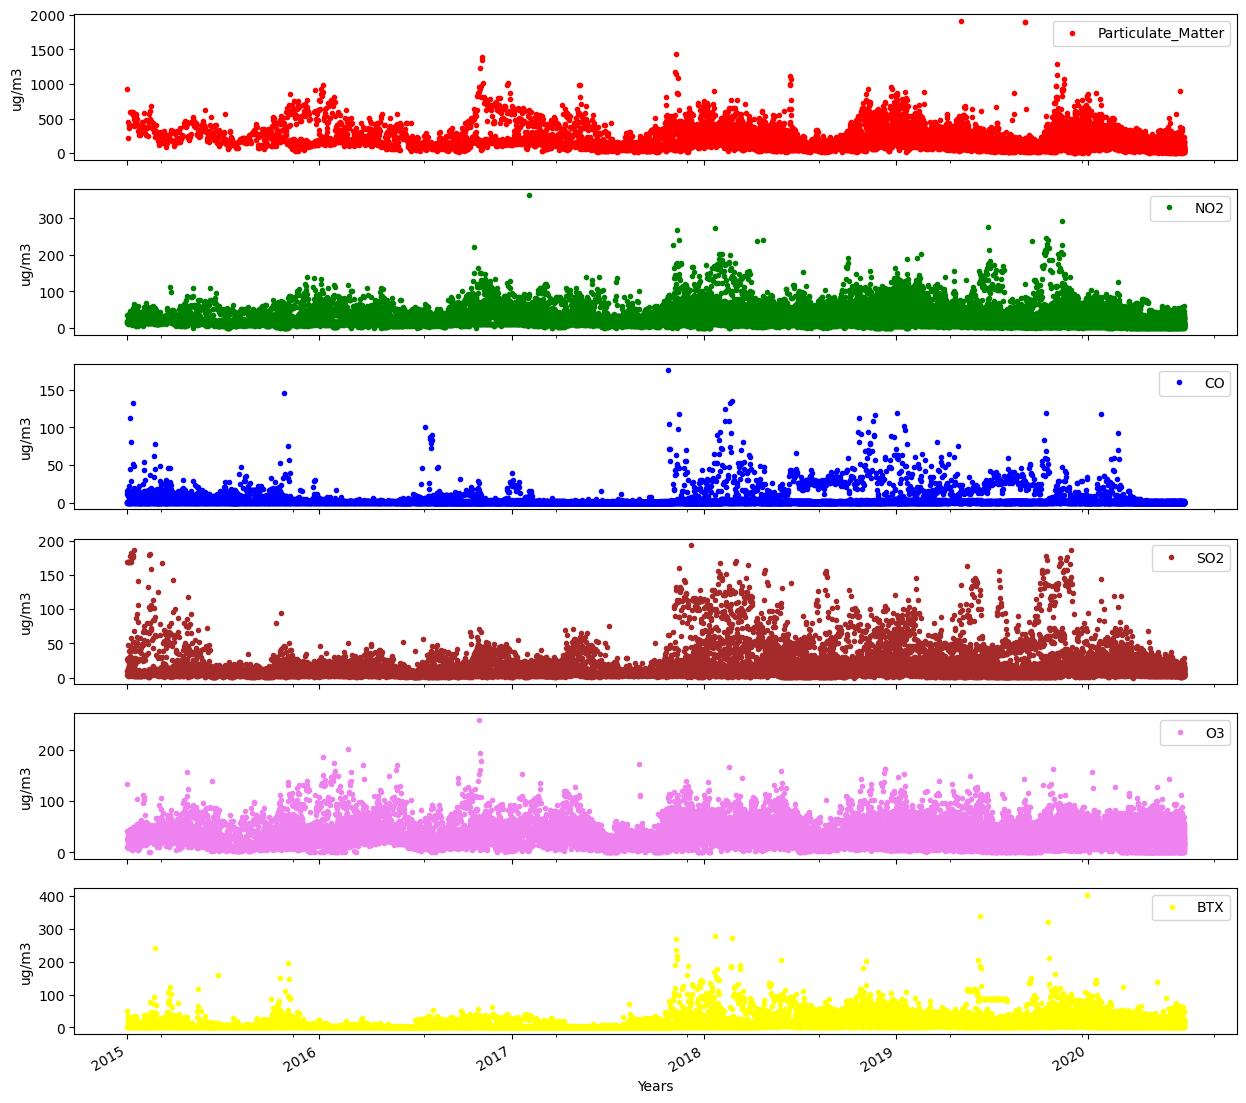

In [20]:
custom_colors = ['red', 'green', 'blue', 'brown', 'violet', 'yellow']
visualisePollutants(updatedCityData, newColumns, colors=custom_colors, save_path='lastimg.png')

In [21]:
def trend_plot(updatedCityData, value, save_path=None):
    data = updatedCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])

    axes[0].set_title('Year-wise Plot', fontsize=18);
    axes[1].set_title('Month-wise Plot', fontsize=18)

    if save_path:
        plt.savefig(save_path)
    plt.show()

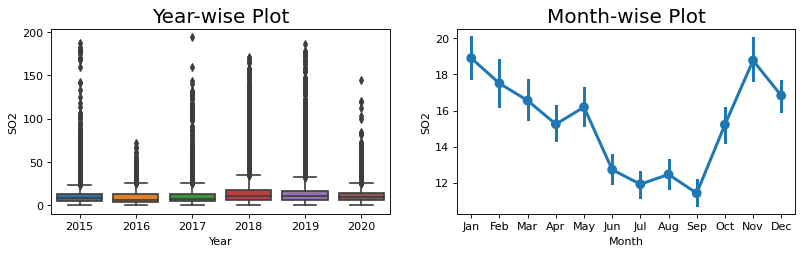

<Figure size 640x480 with 0 Axes>

In [22]:
value='SO2'
trend_plot(updatedCityData,value, save_path='timeplot.png')

In [23]:
def visualiseAQI(udata, columns, save_path=None):
    data = udata.copy()
    data.set_index('Date',inplace=True)

    axes = data[columns].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('AQI')

    if save_path:
        plt.savefig(save_path)
    plt.show()

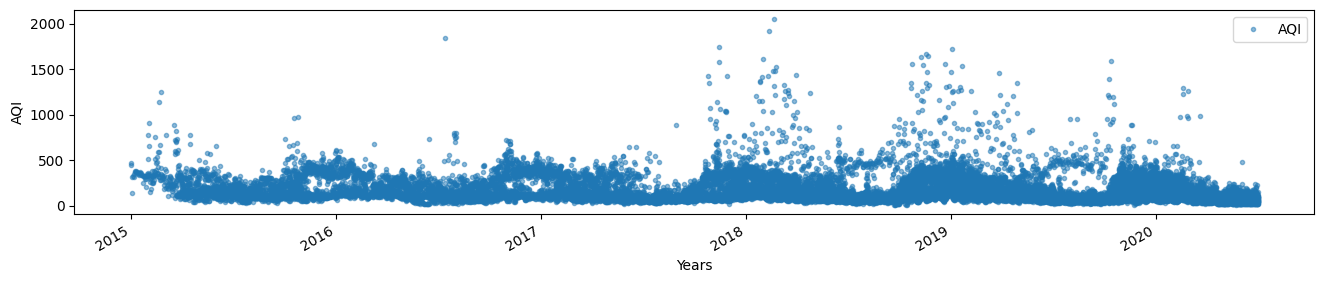

In [24]:
visualiseAQI(updatedCityData, ['AQI'], save_path='AQI_scatter.png')

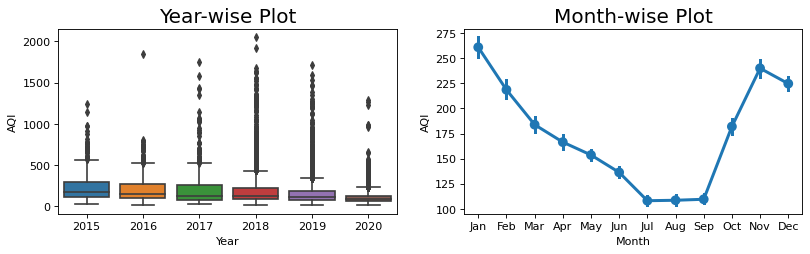

<Figure size 640x480 with 0 Axes>

In [25]:
value='AQI'
trend_plot(updatedCityData,value, save_path='aqi_box.png')

In [26]:
city= ['Lucknow']
filtered_city_day = updatedCityData[updatedCityData['Date'] >= '2016-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(city)][['Date','City','AQI','AQI_Bucket']]

In [27]:
AQI_com = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_com.fillna(method='bfill',inplace=True)

In [28]:
print(AQI_com)

City        Lucknow
Date               
2016-01-01    375.0
2016-01-02    366.0
2016-01-03    315.0
2016-01-04    304.0
2016-01-05    313.0
...             ...
2020-06-27     74.0
2020-06-28     77.0
2020-06-29     65.0
2020-06-30     69.0
2020-07-01     76.0

[1644 rows x 1 columns]


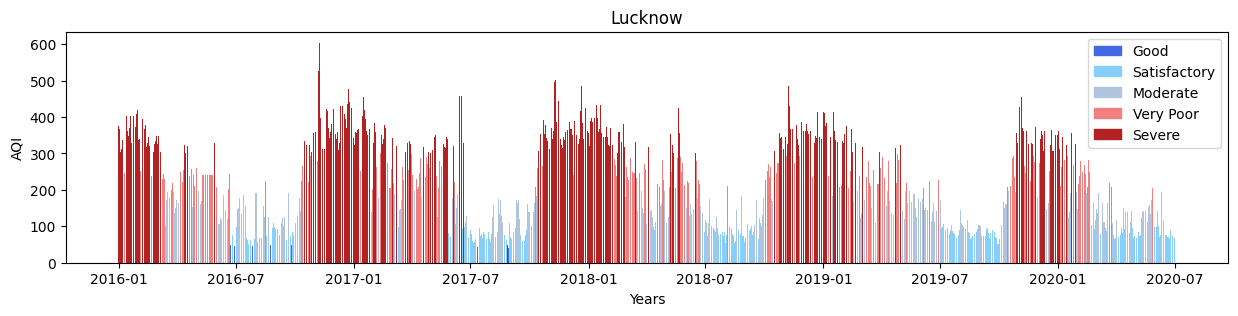

In [30]:
def getColorBar(city):
    col = []
    for val in AQI_com[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue')
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col

de = getColorBar('Lucknow')

colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Very Poor':'lightcoral', 'Severe':'firebrick'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

f, ax = plt.subplots(1, 1, figsize=(15,3))
ax.bar(AQI_com.index, AQI_com['Lucknow'], color = de, width = 0.75)

ax.legend(handles, labels, loc='upper right')

ax.title.set_text('Lucknow')

ax.set_ylabel('AQI')
ax.set_xlabel('Years')
plt.savefig('trend.png')

In [31]:
print(updatedCityData)

            Date           City   AQI    AQI_Bucket  Particulate_Matter  \
0     2015-01-01      Ahmedabad   NaN           NaN                 NaN   
1     2015-01-02      Ahmedabad   NaN           NaN                 NaN   
2     2015-01-03      Ahmedabad   NaN           NaN                 NaN   
3     2015-01-04      Ahmedabad   NaN           NaN                 NaN   
4     2015-01-05      Ahmedabad   NaN           NaN                 NaN   
...          ...            ...   ...           ...                 ...   
29526 2020-06-27  Visakhapatnam  41.0          Good               65.96   
29527 2020-06-28  Visakhapatnam  70.0  Satisfactory               98.47   
29528 2020-06-29  Visakhapatnam  68.0  Satisfactory               88.64   
29529 2020-06-30  Visakhapatnam  54.0  Satisfactory               66.61   
29530 2020-07-01  Visakhapatnam  50.0          Good               81.00   

         NO2     CO    SO2      O3    BTX  
0      18.22   0.92  27.64  133.36   0.02  
1      15.6

In [32]:
def aq(val):
    if pd.isna(val) or np.isnan(val):
        return 'N/A'
    if val < 50:
        return 'good'
    elif val < 101:
        return 'satisfactory'
    elif val < 201:
        return 'moderate'
    elif val < 301:
        return 'poor'
    elif val < 401:
        return 'very poor'
    else:
        return 'severe'

updatedCityData['Condition'] = updatedCityData['AQI'].apply(aq)

print(updatedCityData)

            Date           City   AQI    AQI_Bucket  Particulate_Matter  \
0     2015-01-01      Ahmedabad   NaN           NaN                 NaN   
1     2015-01-02      Ahmedabad   NaN           NaN                 NaN   
2     2015-01-03      Ahmedabad   NaN           NaN                 NaN   
3     2015-01-04      Ahmedabad   NaN           NaN                 NaN   
4     2015-01-05      Ahmedabad   NaN           NaN                 NaN   
...          ...            ...   ...           ...                 ...   
29526 2020-06-27  Visakhapatnam  41.0          Good               65.96   
29527 2020-06-28  Visakhapatnam  70.0  Satisfactory               98.47   
29528 2020-06-29  Visakhapatnam  68.0  Satisfactory               88.64   
29529 2020-06-30  Visakhapatnam  54.0  Satisfactory               66.61   
29530 2020-07-01  Visakhapatnam  50.0          Good               81.00   

         NO2     CO    SO2      O3    BTX     Condition  
0      18.22   0.92  27.64  133.36   0.02

<ipython-input-32-d9752d4a2056>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedCityData['Condition'] = updatedCityData['AQI'].apply(aq)


In [33]:
print(updatedCityData.columns)
updatedCityData.loc['Date'] = pd.to_datetime(updatedCityData['Date'])

Index(['Date', 'City', 'AQI', 'AQI_Bucket', 'Particulate_Matter', 'NO2', 'CO',
       'SO2', 'O3', 'BTX', 'Condition'],
      dtype='object')


<ipython-input-33-4f2a3f19bff3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedCityData.loc['Date'] = pd.to_datetime(updatedCityData['Date'])


In [34]:
updatedCityData = updatedCityData[['City','Date','AQI','AQI_Bucket']]
updatedCityData.head()

,City,Date,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN


In [35]:
updatedCityData['AQI'] = updatedCityData['AQI'].fillna(updatedCityData['AQI'].mean(axis=0))
updatedCityData

<ipython-input-35-31887ce3446f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedCityData['AQI'] = updatedCityData['AQI'].fillna(updatedCityData['AQI'].mean(axis=0))


,City,Date,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,166.463581,NaN
1,Ahmedabad,2015-01-02,166.463581,NaN
2,Ahmedabad,2015-01-03,166.463581,NaN
3,Ahmedabad,2015-01-04,166.463581,NaN
4,Ahmedabad,2015-01-05,166.463581,NaN
...,...,...,...,...
29527,Visakhapatnam,2020-06-28,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,54.000000,Satisfactory
29530,Visakhapatnam,2020-07-01,50.000000,Good


In [36]:
updatedCityData['City'] = updatedCityData['City'].fillna('')
cities=pd.unique(updatedCityData['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]
updatedCityData.columns

<ipython-input-36-6b933d6e2bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedCityData['City'] = updatedCityData['City'].fillna('')


Index(['City', 'Date', 'AQI', 'AQI_Bucket'], dtype='object')

In [37]:
final_data= pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'), columns=column1)
for city,i in zip(cities, final_data.columns):
    n = len(np.array(updatedCityData[updatedCityData['City'] == city]['AQI']))
    final_data[i][-n:] = np.array(updatedCityData[updatedCityData['City']==city]['AQI'])

final_data=final_data.astype('float64')
final_data=final_data.resample(rule='MS').mean()

In [38]:
final_data.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,_AQI
2020-03-01,273.885922,70.164932,52.548387,86.402051,90.741935,115.206153,139.132239,55.419355,70.290323,103.876524,...,130.369793,122.838710,134.000000,104.645161,158.419355,67.870968,128.362744,74.741935,87.724632,NaN
2020-04-01,120.733333,39.233333,44.400000,80.259383,68.533333,126.074836,141.728478,48.648786,63.500000,120.200885,...,77.033333,70.366667,106.733333,74.333333,131.166667,154.368437,133.282119,57.066667,61.797572,NaN
2020-05-01,128.677419,24.193548,59.096774,77.677419,73.161290,104.451613,148.400558,74.129032,78.677419,64.933134,...,89.997650,53.161290,119.096774,63.935484,138.516129,32.451613,109.737236,55.967742,64.903226,NaN
2020-06-01,101.964239,25.715453,47.866667,101.533333,55.166667,71.666667,156.637532,66.500000,103.066667,38.366667,...,93.866667,46.466667,96.500000,53.300000,82.366667,41.597572,115.218766,45.400000,82.200000,NaN
2020-07-01,119.000000,20.000000,54.000000,78.000000,43.000000,69.000000,166.463581,66.000000,92.000000,166.463581,...,102.000000,45.000000,76.000000,53.000000,98.000000,24.000000,101.000000,41.000000,50.000000,166.463581


In [39]:
a = final_data['Lucknow_AQI']
a.tail()

2020-03-01    134.000000
2020-04-01    106.733333
2020-05-01    119.096774
2020-06-01     96.500000
2020-07-01     76.000000
Freq: MS, Name: Lucknow_AQI, dtype: float64

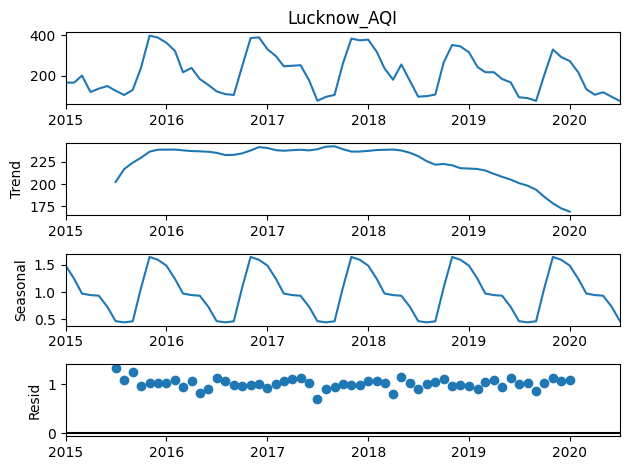

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
Lucknow_AQI = final_data['Lucknow_AQI']
result = seasonal_decompose(Lucknow_AQI, model='multiplicative')
result.plot();
Lucknow_AQI
plt.savefig('plot.png')

In [50]:
Lucknow_aqi=Lucknow_AQI
Lucknow_aqi.columns=['ind', 'date', 'aqi']
Lucknow_aqi.drop('ind', axis=1, inplace=True)
print(Lucknow_aqi.columns)

Index(['date', 'aqi'], dtype='object')


In [52]:
Lucknow_aqi=Lucknow_aqi.set_index('date')

         date         aqi
0  2015-01-01  166.463581
1  2015-02-01  166.463581
2  2015-03-01  201.170053
3  2015-04-01  120.182119
4  2015-05-01  137.000000
..        ...         ...
62 2020-03-01  134.000000
63 2020-04-01  106.733333
64 2020-05-01  119.096774
65 2020-06-01   96.500000
66 2020-07-01   76.000000

[67 rows x 2 columns]


In [53]:
print(Lucknow_aqi)

                   aqi
date                  
2015-01-01  166.463581
2015-02-01  166.463581
2015-03-01  201.170053
2015-04-01  120.182119
2015-05-01  137.000000
...                ...
2020-03-01  134.000000
2020-04-01  106.733333
2020-05-01  119.096774
2020-06-01   96.500000
2020-07-01   76.000000

[67 rows x 1 columns]


In [54]:
train=Lucknow_aqi[:-24]
test=Lucknow_aqi[-24:-12]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [55]:
print(scaled_train)

[[0.27825223]
 [0.27825223]
 [0.38654875]
 [0.13383764]
 [0.1863154 ]
 [0.2258399 ]
 [0.15374932]
 [0.08807454]
 [0.16592908]
 [0.50841657]
 [1.        ]
 [0.96972584]
 [0.8900058 ]
 [0.76465708]
 [0.43755431]
 [0.50344749]
 [0.33255747]
 [0.24230683]
 [0.14422627]
 [0.10204381]
 [0.08864828]
 [0.52341441]
 [0.96213969]
 [0.97365145]
 [0.79035575]
 [0.68367771]
 [0.52975577]
 [0.53735535]
 [0.54586083]
 [0.31137827]
 [0.        ]
 [0.05979003]
 [0.08916834]
 [0.56720003]
 [0.9543388 ]
 [0.92734941]
 [0.93822032]
 [0.75020814]
 [0.4967404 ]
 [0.32309096]
 [0.55653043]
 [0.30468087]
 [0.06280973]]


In [56]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given: \n{X.flatten()}')
print(f'Predict: \n {y}')

Given: 
[0.27825223 0.27825223 0.38654875 0.13383764 0.1863154  0.2258399
 0.15374932 0.08807454 0.16592908 0.50841657 1.         0.96972584
 0.8900058  0.76465708 0.43755431 0.50344749 0.33255747 0.24230683
 0.14422627 0.10204381 0.08864828 0.52341441 0.96213969 0.97365145]
Predict: 
 [[0.79035575]]


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [58]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [59]:
model.fit_generator(generator,epochs=300)

Epoch 1/300


<ipython-input-59-a63b2a8d0a68>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=300)


19/19 [==============================] - 4s 21ms/step - loss: 0.2787
Epoch 2/300
19/19 [==============================] - 0s 21ms/step - loss: 0.1281
Epoch 3/300
19/19 [==============================] - 0s 20ms/step - loss: 0.1147
Epoch 4/300
19/19 [==============================] - 0s 21ms/step - loss: 0.1075
Epoch 5/300
19/19 [==============================] - 0s 20ms/step - loss: 0.0986
Epoch 6/300
19/19 [==============================] - 0s 19ms/step - loss: 0.1082
Epoch 7/300
19/19 [==============================] - 0s 20ms/step - loss: 0.1067
Epoch 8/300
19/19 [==============================] - 0s 20ms/step - loss: 0.0989
Epoch 9/300
19/19 [==============================] - 0s 21ms/step - loss: 0.0966
Epoch 10/300
19/19 [==============================] - 1s 31ms/step - loss: 0.1029
Epoch 11/300
19/19 [==============================] - 1s 30ms/step - loss: 0.0955
Epoch 12/300
19/19 [==============================] - 1s 32ms/step - loss: 0.0963
Epoch 13/300
19/19 [=================

1/1 [==============================] - 0s 25ms/step


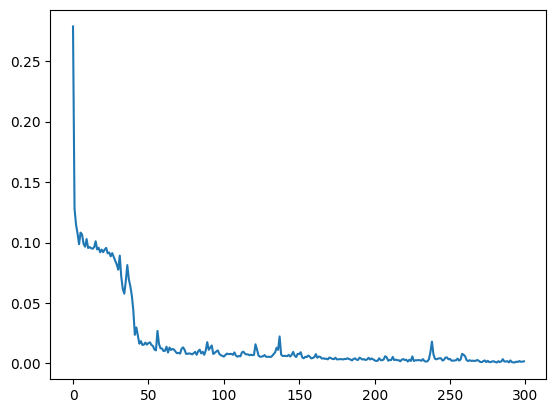

In [60]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

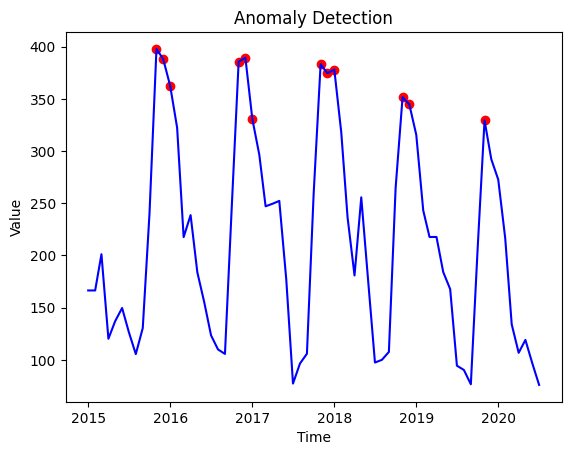

In [63]:
anomaly_dates = Lucknow_aqi.index
anomaly_values = Lucknow_aqi['aqi']
import matplotlib.pyplot as plt

plt.plot(anomaly_dates, anomaly_values, color='blue', label='Original Data')

threshold = 326

for i in range(len(Lucknow_aqi['aqi'])):
    if Lucknow_aqi.values[i] > threshold:
        plt.scatter(Lucknow_aqi.index[i], Lucknow_aqi.values[i], color='red', marker='o')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection')
plt.show()

<ipython-input-64-a2dd44c3ff05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


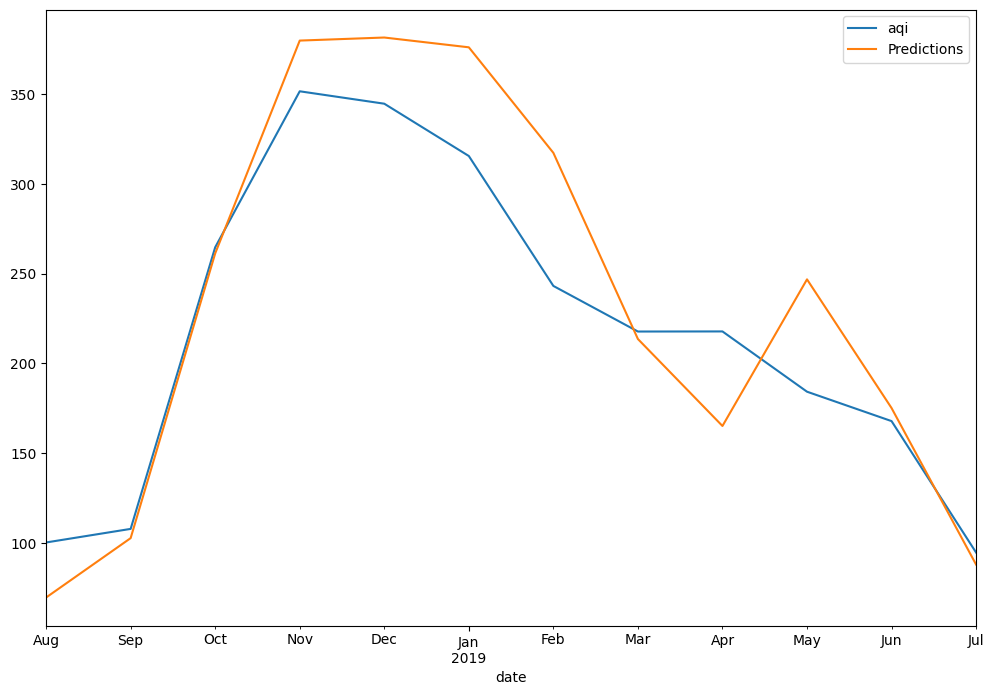

In [64]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(12,8))
plt.plot(true_predictions)

In [65]:
scaler.fit(Lucknow_aqi)
scaled_City_AQI=scaler.transform(Lucknow_aqi)
generator = TimeseriesGenerator(scaled_City_AQI, scaled_City_AQI, length=n_input, batch_size=1)
test_predictions = []

first_eval_batch = scaled_City_AQI[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):


    current_pred = model.predict(current_batch)[0]


    test_predictions.append(current_pred)


    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 38ms/step


In [66]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.flatten()
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2020-06-01',periods=12,freq='MS'))

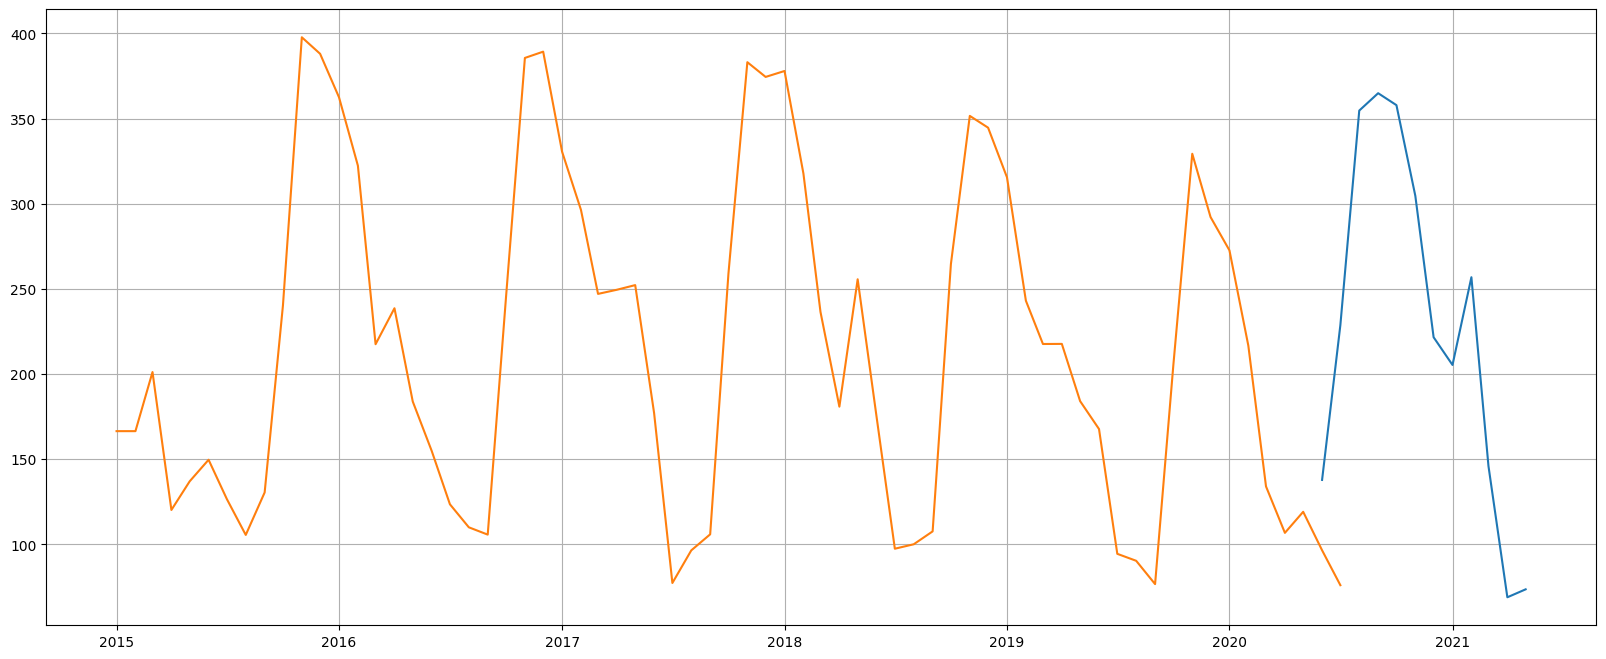

In [69]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( Lucknow_aqi['aqi'])
plt.savefig('predictions.png')